In [40]:
"""
    - 概述
        - 机器学习的问题
            - 建模问题
                - 所谓机器学习，在形式上可这样理解：在数据对象中通过统计或推理的方法，寻找一个接受特定输入X，并给出预期输出Y的功能函数f，即Y=f(X)。
            - 评估问题
                - 针对已知的输入，函数给出的输出(预测值)与实际输出(目标值)之间存在一定的误差，因此需要构建一个评估体系，根据误差的大小判定函数的优劣。
            - 优化问题
                - 学习的核心在于改善性能，通过数据对算法的反复锤炼，不断提升函数预测的准确性，直至获得能够满足实际需求的最优解，这个过程就是机器学习。
        - 机器学习的种类
            - 监督学习、无监督学习、半监督学习、强化学习
                - 有监督学习：用已知输出评估模型的性能。
                - 无监督学习：在没有已知输出的情况下，仅仅根据输入信息的相关性，进行类别的划分。
                - 半监督学习：先通过无监督学习划分类别，再根据人工标记通过有监督学习预测输出。
                - 强化学习：通过对不同决策结果的奖励和惩罚，使机器学习系统在经过足够长时间的训练以后，越来越倾向于给出接近期望结果的输出。

            - 批量学习和增量学习
                - 批量学习：将学习的过程和应用的过程截然分开，用全部的训练数据训练模型，然后再在应用场景中实现预测，当预测结果不够理想时，
                  重新回到学习过程，如此循环。
                - 增量学习：将学习的过程和应用的过程统一起来，在应用的同时以增量的方式，不断学习新的内容，边训练边预测。
        - 机器学习的一般过程
            - 数据处理
                - 数据收集 （数据检索、数据挖掘、爬虫）
                - 数据清洗
                - 特征工程
            - 机器学习
                - 选择模型 （算法）
                - 训练模型 （算法）
                - 评估模型 （工具、框架、算法知识）
                - 测试模型
            - 业务运维
                - 应用模型
                - 维护模型
        - 机器学习的典型应用
            - 股价预测、推荐引擎、自然语言识别、语音识别、图像识别、人脸识别
        - 机器学习的基本问题
            - 回归问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到连续的输出。
            - 分类问题：根据已知的输入和输出寻找某种性能最佳的模型，将未知输出的输入代入模型，得到离散的输出。
            - 聚类问题：根据已知输入的相似程度，将其划分为不同的群落。
            - 降维问题：在性能损失尽可能小的前提下，降低数据的复杂度。
    - 数据预处理(数据预处理的过程： 输入数据 -> 模型 -> 输出数据)
        - 均值移除(标准化)
        - 范围缩放
        - 归一化
        - 二值化
        - 独热编码
        - 标签编码
    - 线性回归
        - 评估训练结果误差（metrics）
        - 模型的保存和加载
        - 岭回归
        - 多项式回归
    - 决策树
    - 人工分类
    - 逻辑分类
    - 朴素贝叶斯分类
    - 决策树分类
"""


In [3]:
"""
    均值移除(标准化)
        - 由于一个样本的不同特征值差异较大，不利于使用现有机器学习算法进行样本处理。均值移除可以让样本矩阵中的每一列的平均值为0，标准差为1。
            - 如何使样本矩阵中的每一列的平均值为0呢？
                例如有一列特征值表示年龄： 17, 20, 23
                mean = (17 + 20 + 23)/3 = 20
                a' = -3
                b' =  0
                c' =  3
                完成！
            - 如何使样本矩阵中的每一列的标准差为1呢？
                a' = -3
                b' =  0
                c' =  3
                s' = std(a', b', c')
                [a'/s',  b'/s',  c'/s']
        - 均值移除API
            from sklearn import preprocessing as pp
            A = pp.scale(array)
                - scale:                用于对函数进行预处理，实现均值移除。
                - array:                为原数组，返回A为均值移除后的结果。

"""
import numpy as np
# 数据预处理相关库
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])

std_samples = pp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]
[ 0.00000000e+00 -3.70074342e-17  5.18104078e-16]
[1. 1. 1.]


In [3]:
"""
    范围缩放(等比例)
        - 将样本矩阵中的每一列的最小值和最大值设定为相同的区间，统一各列特征值的范围。一般情况下会把特征值缩放至[0, 1]区间。
            - 如何使一组特征值的最小值为0呢？
                - 例如有一列特征值表示年龄： [17, 20, 23]
                - 每个元素减去特征值数组所有元素的最小值即可：[0, 3, 6]
            - 如何使一组特征值的最大值为1呢？
                - [0, 3, 6]
                - 把特征值数组的每个元素除以最大值即可：[0, 1/2, 1]
        - 范围缩放API：
            from sklearn import preprocessing as pp
            - mms = pp.MinMaxScaler(feature_range=(0,1))
                - feature_range                 缩放范围
            - mms.fit_transform(array)
                - array                         原始样本矩阵
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 创建MinMax缩放器
mms = pp.MinMaxScaler(feature_range=(0, 1))
# 调用mms对象的方法执行缩放操作, 返回缩放过后的结果
result = mms.fit_transform(raw_samples)
print(result)

print("*" * 50)
#案例（求取直线 y = kx + b 中的 k 与 b,并通过直接方程求取对应的 y）
mms_simple = raw_samples.copy()
#拿到原始数据的每一列的数据
for col in mms_simple.T:
    #拿到每一列的最小值
    col_min = col.min()
    #拿到每一列的最大值
    col_max = col.max()
    a = np.array([
        [col_min, 1],
        [col_max, 1]])
    b = np.array([0, 1])
    #获取未知数x的值
    x = np.linalg.solve(a, b)
    # print(x)
    #求取每一个kx，并将结果赋值给col变量
    col *= x[0]
    #将col与b相加,并将结果赋值给col变量
    col += x[1]
#返回kx+b所求得的所有结果
print(mms_simple)


[[0.         1.         0.        ]
 [0.5        0.2        0.66666667]
 [1.         0.         1.        ]]
**************************************************
[[0.         1.         0.        ]
 [0.5        0.2        0.66666667]
 [1.         0.         1.        ]]


In [6]:
"""
    归一化
        - 有些情况每个样本的每个特征值具体的值并不重要，但是每个样本特征值的占比更加重要。
                            Python        Java         PHP
                    2017      10           20           5
                    2018      8            5            0
          所以归一化即是用每个样本的每个特征值除以该样本各个特征值绝对值的总和。变换后的样本矩阵，每个样本的特征值绝对值之和为1。
        - 归一化相关API：
            from sklearn import preprocessing as pp
            - pp.normalize(array,norm="l1")
                - array                     原始样本矩阵
                - norm                      范数
                    - l1                    l1范数，向量中个元素绝对值之和
                    - l2                    l2范数，向量中个元素平方之和
"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 归一化预处理
result = pp.normalize(raw_samples, norm="l1")
print(result)
print("*" * 50)
#手动实现归一化
nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= np.sum(np.abs(row))
print(nor_samples)

[[0.00412922 0.02428953 0.97158125]
 [0.00392157 0.01568627 0.98039216]
 [0.00410861 0.01339764 0.98249375]]
**************************************************
[[0.00412922 0.02428953 0.97158125]
 [0.00392157 0.01568627 0.98039216]
 [0.00410861 0.01339764 0.98249375]]


[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
**************************************************
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


D:\PycharmProjects\dataAnalysis\venv\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


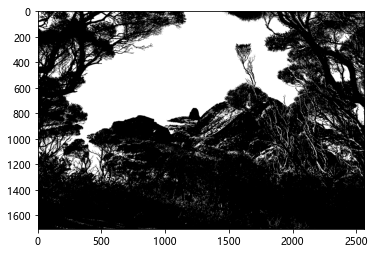

In [1]:
"""
    二值化
        - 有些业务并不需要分析矩阵的详细完整数据（比如图像边缘识别只需要分析出图像边缘即可），可以根据一个事先给定的阈值，用0和1表示特征值不高于
          或高于阈值。二值化后的数组中每个元素非0即1，达到简化数学模型的目的。
        - 二值化相关API：
            from sklearn import preprocessing as pp
                - bin = pp.Binarizer(threshold)
                    - threshold                  阈值
                - result = bin.transform(array)
                    - array                      原始样本矩阵


"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    [17., 100., 4000.],
    [20., 80., 5000.],
    [23., 75., 5500.]
])
# 根据给定的阈值创建一个二值化器
bin_simples = pp.Binarizer(threshold=80)
# 通过二值化器进行二值化预处理
result = bin_simples.transform(raw_samples)
print(result)
print("*" * 50)
#手动实现二值化
binar_samples = raw_samples.copy()
binar_samples[binar_samples <= 80] = 0
binar_samples[binar_samples > 80] = 1
print(binar_samples)

#二值化图片
from scipy import ndimage
from matplotlib import pyplot as plt

#True:提取灰度图片
from matplotlib import rc

rc("font", family='Microsoft YaHei')
original = ndimage.imread("1.jpg", True)
bin_images = pp.Binarizer(threshold=127)
result = bin_images.transform(original)
plt.imshow(result, cmap="gray")


In [33]:
"""
    独热编码(使用场景:适用于离散型的文本 如:计算文本相似度)
        - 为样本特征的每个值建立一个由一个1和若干个0组成的序列，用该序列对所有的特征值进行编码。
            两个数   三个数	四个数
              1		 3		 2
              7		 5		 4
              1		 8		 6
              7		 3		 9
            为每一个数字进行独热编码：
            1-10    3-100	2-1000
            7-01    5-010   4-0100
                    8-001   6-0010
                            9-0001
            编码完毕后得到最终经过独热编码后的样本矩阵：
            101001000
            010100100
            100010010
            011000001
        - 独热编码相关API：
            from sklearn import preprocessing as pp
            - ohe = sp.OneHotEncoder(sparse,dtype)
                - sparse                       是否使用紧缩格式（稀疏矩阵）
                - dtype                        数据类型
            - ohe_dict = ohe.fit(array)
                - array                        原始样本矩阵
            - ohe_samples = ohe_dict.transform(array)
                - array                        原始样本矩阵

"""
from sklearn import preprocessing as pp
import numpy as np

raw_samples = np.array([
    [17., 100., 4000],
    [20., 80., 5000],
    [23., 75., 5500]])

# 创建独热编码器
ohe = pp.OneHotEncoder(sparse=False, dtype=int)
# 用独特编码器对原始样本矩阵做独热编码
# ohe_dict = ohe.fit(raw_samples)
# ohe_samples = ohe_dict.transform(raw_samples)
#或者
ohe_samples = ohe.fit_transform(raw_samples)
print(ohe_samples)

[[1 0 0 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 0 0 1]]


In [35]:
"""
    标签编码
        根据字符串形式的特征值在特征序列中的位置，为其指定一个数字标签，用于提供给基于数值算法的学习模型。
        - 标签编码相关API：
            - lbe = sp.LabelEncoder()
            - lbe_samples = lbe.fit_transform(array)
                - array                        原始样本矩阵
            - origin_samples = lbe.inverse_transform(array)
                - array                        标签编码结果

"""
import numpy as np
from sklearn import preprocessing as pp

raw_samples = np.array([
    'audi', 'ford', 'audi', 'toyota',
    'ford', 'bmw', 'toyota', 'ford',
    'audi'])
print(raw_samples)
# 获取标签编码器
lbe = pp.LabelEncoder()
# 调用标签编码器的fit_transform方法训练并且为原始样本矩阵进行标签编码
lbe_samples = lbe.fit_transform(raw_samples)
print(lbe_samples)
# 根据标签编码的结果矩阵反查字典 得到原始数据矩阵
samples = lbe.inverse_transform(lbe_samples)
print(samples)

['audi' 'ford' 'audi' 'toyota' 'ford' 'bmw' 'toyota' 'ford' 'audi']
[0 2 0 3 2 1 3 2 0]
['audi' 'ford' 'audi' 'toyota' 'ford' 'bmw' 'toyota' 'ford' 'audi']


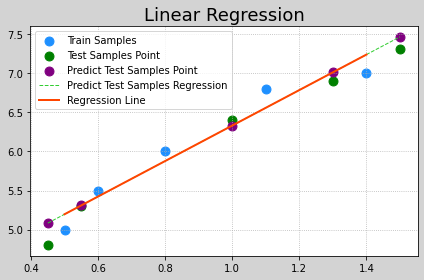

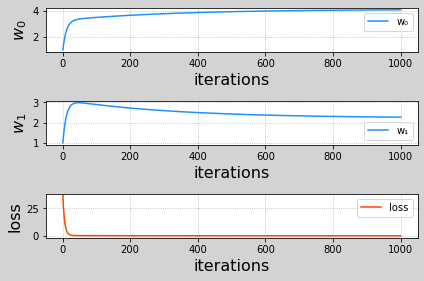

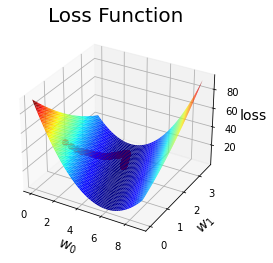

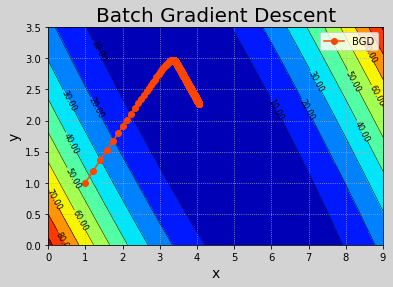

In [3]:
"""
    线性回归(概念及手动实现)
        输入		 输出
        0.5      5.0
        0.6      5.5
        0.8      6.0
        1.1      6.8
        1.4      7.0
        ...
        y = f(x)
        - 预测函数：y = w₀+w₁x
            x: 输入
            y: 输出
            w₀和w₁: 模型参数
        - 所谓模型训练，就是根据已知的x和y，找到最佳的模型参数w₀和w₁，尽可能精确地描述出输入和输出的关系
            5.0 = w₀+ w₁ * 0.5
            5.5 = w₀+ w₁ * 0.6
        - 单样本误差：
            根据预测函数求出输入为x时的预测值：y' = w₀+ w₁x，单样本误差为1/2(y' - y)²。
        - 总样本误差：
            把所有单样本误差相加即是总样本误差：1/2*∑(y' - y)²
        - 损失函数：
            loss = 1/2*∑(w₀+ w₁x - y)²
            - 所以损失函数就是总样本误差关于模型参数的函数，该函数属于三维数学模型，即需要找到一组w₀、w₁使得loss取极小值。

"""
from sklearn import linear_model as lm
#案例：画图模拟梯度下降的过程
#1. 整理训练集数据，自定义梯度下降算法规则，求出w₀, w₁，绘制回归线。
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as axes3d

# from matplotlib import rc
# rc("font",family='Microsoft YaHei')

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
test_x = np.array([0.45, 0.55, 1.0, 1.3, 1.5])
test_y = np.array([4.8, 5.3, 6.4, 6.9, 7.3])
#设置w0,w1初始值
w0, w1 = [1], [1]  #使用列表是为了绘制变化曲线，在该图中，三维曲面图中x轴为w₀, y轴为w₁
#迭代次数(需要自己调参)
times = 1000
#学习率(需要自己调参)
lrate = 0.01
#损失函数列表(绘制变化曲线使用)
losses = []
#迭代次数列表(绘制变化曲线使用)
epoches = []
for i in range(1, times + 1):
    epoches.append(i)
    #求损失函数关于w0与w1的偏导数,从而更新模型参数  损失函数公式：1/2*∑(w₀+ w₁x - y)²
    #损失函数对w0求偏导数 d0 = ∑(w₀+ w₁x - y)
    d0 = (w0[-1] + w1[-1] * train_x - train_y).sum()
    #损失函数对w1求偏导数 d1 = ∑[x(w₀+ w₁x - y)]
    d1 = (train_x * (w0[-1] + w1[-1] * train_x - train_y)).sum()
    #根据梯度下降公式,更新w₀,w₁模型参数(lrate * 偏导 :每次梯度下降的距离)
    w0_distance = w0[-1] - lrate * d0
    w1_distance = w1[-1] - lrate * d1
    w0.append(w0_distance)
    w1.append(w1_distance)
    loss = ((w0[-1] + w1[-1] * train_x - train_y) ** 2).sum() / 2
    losses.append(loss)
    # print("迭代次数:{0:4} w₀:{1:.8f} w₁:{2:.8f} loss:{3:.8f}".format(i,w0_distance,w1_distance,loss))

# print(len(epoches),len(w0),len(w1),len(losses))

#求出最佳的模型参数w₀,w₁
# print("最佳的模型参数w₀:{},w₁:{}".format(w0,w1))


#根据训练好的w₀和w₁，预测test测试数组，并获得测试数组y的值
pre_test_y = w0[-1] + w1[-1] * test_x
plt.figure("Linear Regression", facecolor="lightgray")
plt.title("Linear Regression", fontdict={"fontsize": 18})
plt.grid(linestyle=":")
#画散点图
plt.scatter(train_x, train_y, s=80, marker="o", color="dodgerblue", label="Train Samples")
plt.scatter(test_x, test_y, s=80, marker="o", color="green", label="Test Samples Point")
plt.scatter(test_x, pre_test_y, s=80, marker="o", color="purple", label="Predict Test Samples Point")
plt.plot(test_x, pre_test_y, '--', c='limegreen', label='Predict Test Samples Regression', linewidth=1)

#通过最佳的模型参数w₀,w₁,绘制回归线
linex = np.linspace(train_x.min(), train_x.max(), 100)
liney = w0[-1] + w1[-1] * linex  # y = w₀+w₁x

plt.plot(linex, liney, color="orangered", linewidth=2, label="Regression Line")
plt.legend()
plt.tight_layout()
#绘制w₀,w₁,loss的变化曲线
plt.figure("Training Progress", facecolor="lightgray")
plt.subplot(311)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_0$", fontdict={"fontsize": 16})
plt.plot(epoches, w0[:-1], color="dodgerblue", label="w₀")

plt.legend()
plt.tight_layout()

plt.subplot(312)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("$w_1$", fontdict={"fontsize": 16})
plt.plot(epoches, w1[:-1], color="dodgerblue", label="w₁")

plt.legend()
plt.tight_layout()

plt.subplot(313)
plt.grid(linestyle=":")
plt.xlabel("iterations", fontdict={"fontsize": 16})
plt.ylabel("loss", fontdict={"fontsize": 16})
plt.plot(epoches, losses, color="orangered", label="loss")

plt.legend()
plt.tight_layout()

# 三维梯度下降图(训练过程图)
number = 500
grid_w0, grid_w1 = np.meshgrid(np.linspace(0, 9, number), np.linspace(0, 3.5, number))
grid_loss = np.zeros_like(grid_w0)

for x, y in zip(train_x, train_y):
    grid_loss += ((grid_w0 + x * grid_w1 - y) ** 2) / 2

plt.figure("Loss Function")
ax = plt.axes(projection="3d")
plt.title("Loss Function", fontdict={"fontsize": 20})
ax.set_xlabel("$w_0$", fontdict={"fontsize": 14})
ax.set_ylabel("$w_1$", fontdict={"fontsize": 14})
ax.set_zlabel("loss", fontdict={"fontsize": 14})
#绘制三维曲面图(指定w₀,w₁的范围，计算loss值)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap="jet")
#绘制梯度下降曲线
ax.plot(w0[:-1], w1[:-1], losses, 'o-', c='red', label='BGD')

#绘制等高线图
plt.figure('Batch Gradient Descent', facecolor='lightgray')
plt.title('Batch Gradient Descent', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=":")
#绘制等高线图(指定w₀,w₁的范围，计算loss值)
cutr = plt.contour(grid_w0, grid_w1, grid_loss, 10, colors="black", linewidths=0.5)
#绘制梯度下降曲线
plt.clabel(cutr, inline_spacing=0.1, fmt="%.2f", fontsize=8)
plt.contourf(grid_w0, grid_w1, grid_loss, 10, cmap="jet")
plt.plot(w0, w1, 'o-', c='orangered', label='BGD')
plt.legend()
plt.show()

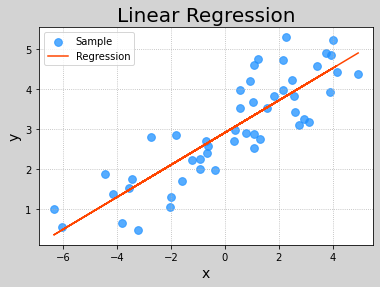

**************************************************
平均绝对值误差: 0.5482812185435971
平均平方误差: 0.43606903238180605
中位绝对值误差: 0.5356597030142565
R2得分: 0.736263899848181
**************************************************
[4.90668558 2.28182342 1.12640097 0.47823715 2.42675446 1.48872857
 3.06284069 1.6135303  3.4452976  3.79152175 4.10151314 2.54753033
 2.55155619 3.41711656 3.54594416 1.2512027  4.42760798 4.58864247
 3.0507631  4.29072866 3.83178037 3.96463382 3.34465105 3.33659932
 4.0209959  2.63207343 1.81079754 3.13933207 1.52898719 3.35672863
 3.91229762 0.36148715 3.65464244 2.64415102 1.37600443 2.10065962
 4.17800452 3.28828897 4.53630626 4.48397005 2.18922859 4.50409936
 2.11273721 3.13530621 3.2319269  3.78347003 3.94450451 2.66428033
 3.34465105 2.77297861]


In [9]:
"""
    线性回归(sklearn实现)
         - 操作步骤
            - 采集数据(读文本)
            - 整理输入集(二维)与输出集(一维)
            - 构建线性回归模型,训练模型
            - 针对训练数据,得到预测结果,画图

        - 线性回归sklearn相关API：
            import sklearn.linear_model as lm
            - 创建模型
                - model = lm.LinearRegression()
                - model.fit(input, output)      通过梯度下降法计算模型参数
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。

        - 评估训练结果误差（metrics）
            - 线性回归模型训练完毕后，可以利用测试集评估训练结果误差。sklearn.metrics提供了计算模型误差的几个常用算法：
                - import sklearn.metrics as sm
                    - sm.mean_absolute_error(y, predict_y)   平均绝对值误差：1/m∑|实际输出-预测输出|
                        - y                     实际值
                        - predict_y             预测值
                    - sm.mean_squared_error(y, predict_y)    平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.median_absolute_error(y, pred_y)    中位绝对值误差：MEDIAN(|实际输出-预测输出|)
                        - y                     实际值
                        - predict_y             预测值
                    - sm.r2_score(y, pred_y)                 R2得分，(0,1]区间的分值。分数越高，误差越小。
                        - y                     实际值
                        - predict_y             预测值

        - 模型的保存和加载
            - 模型训练是一个耗时的过程，一个优秀的机器学习是非常宝贵的。可以模型保存到磁盘中，也可以在需要使用的时候从磁盘中重新加载模型即可。
              不需要重新训练。
                import pickle
                - pickle.dump(内存对象, 磁盘文件)   保存模型
                - model = pickle.load(磁盘文件)    加载模型

        - 岭回归
            - 普通线性回归模型使用基于梯度下降的最小二乘法，在最小化损失函数的前提下，寻找最优模型参数，于此过程中，包括少数异常样本在内的全
              部训练数据都会对最终模型参数造成程度相等的影响，异常值对模型所带来影响无法在训练过程中被识别出来。为此，岭回归在模型迭代过程所
              依据的损失函数中增加了正则项，以限制模型参数对异常样本的匹配程度，进而提高模型面对多数正常样本的拟合精度。
            import sklearn.linear_model as lm
                - model = lm.Ridge(alpha，fit_intercept, max_iter)
                    - alpha                     正则强度(默认1.0)
                    - fit_intercept             是否训练截距
                    - max_iter                  最大迭代次数
                - model.fit(input, output)      训练模型
                    - input             输入为一个二维数组表示的样本矩阵
                    - output            输出为每个样本最终的结果(一维数组)
                - model.predict(array)          预测输出
                    - array             二维数组，每一行是一个样本，每一列是一个特征。


"""
import sklearn.linear_model as lm
import numpy as np
from matplotlib import pyplot as plt
#采集数据
x, y = np.loadtxt("./ml_data/single.txt", delimiter=",", unpack=True, usecols=(0, 1))
#将维度转为二维数据(其中每列为特征数据:sklearn规定)
x = x.reshape(-1, 1)  #n行1列的二维数组(唯一特征列)

#创建线性模型对象
model = lm.LinearRegression()
#训练模型
model.fit(x, y)
#根据输入预测输出
predict_y = model.predict(x)
# print(predict_y)
plt.figure('Linear Regression', facecolor="lightgray")
plt.title('Linear Regression', fontsize=20)
plt.xlabel("x", fontdict={"fontsize": 14})
plt.ylabel("y", fontdict={"fontsize": 14})
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.scatter(x, y, c='dodgerblue', alpha=0.75, s=60, label='Sample')
plt.plot(x, predict_y, c='orangered', label='Regression')
plt.legend()
plt.show()


print("*"*50)
import sklearn.metrics as sm
'''评估训练结果误差（metrics）'''
# 平均绝对值误差：1/m∑|实际输出-预测输出|
print("平均绝对值误差: {}".format(sm.mean_absolute_error(y, predict_y)))
# 平均平方误差：SQRT(1/mΣ(实际输出-预测输出)^2)
print("平均平方误差: {}".format(sm.mean_squared_error(y,predict_y)))
# 中位绝对值误差：MEDIAN(|实际输出-预测输出|)
print("中位绝对值误差: {}".format(sm.median_absolute_error(y, predict_y)))
# R2得分，(0,1]区间的分值。分数越高，误差越小。
print("R2得分: {}".format(sm.r2_score(y,predict_y)))



print("*"*50)
'''模型的保存和加载'''
import pickle
with open("sklearn_data/linear.pkl","wb") as f:
    #保存模型对象
    pickle.dump(model,f)

with open("sklearn_data/linear.pkl","rb") as f:
    #加载模型对象
    model = pickle.load(f)
    predict_y = model.predict(x)
    print(predict_y)
#岭回归

